In [6]:
# !pip install scikeras>=0.1.8
# !pip install tensorflow>=2.3.0
# !pip install -U skorch
# !pip install torch
# !pip install torchvision
# !pip install pytorch-cpu #not sure if i need to fix this
# !pip install s3fs
# !pip install dask_kubernetes
# !pip install pyarrow
# !pip install xgboost

     |████████████████████████████████| 22.4 MB 424 kB/s eta 0:00:01


In [34]:
# !pip install cloudpickle==2.1.0
# !pip install dask==2022.05.0
# !pip install distributed==2022.5.0
# !pip install lz4==4.0.0
# !pip install msgpack==1.0.3
# !pip install toolz==0.11.2
# !pip install xgboost

In [1]:
# https://coiled.io/blog/tackling-unmanaged-memory-with-dask/

In [9]:
from dask.distributed import Client
# when working with clusters, specify cluster config, n_workers and worker_size
client = Client(n_workers=4, 
                       threads_per_worker=1,
                       memory_limit=0)

In [3]:
import dask.dataframe as dd


In [11]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55043,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: 2 minutes ago,Total memory: 0 B
Comm: tcp://127.0.0.1:55064,Total threads: 1
Dashboard: http://127.0.0.1:55065/status,Memory: 0 B
Nanny: tcp://127.0.0.1:55047,


In [12]:
# filename = 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2013-01.parquet'
filename = './nyc_taxi/yellow_tripdata_2013-01.parquet'
# filename = './nyc_taxi/yellow_tripdata_2019-01.parquet'
df = dd.read_parquet(
    filename,
    split_row_groups = 2
    # chunks=10000
)
#Chunksize might be deprecated in future.
#Use row-groups, read on what row-groups are in apidoc

In [13]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge             object
airport_fee                      object
dtype: object

In [14]:
df.shape

(Delayed('int-4b201e26-1313-425f-b771-8441accb8aa1'), 19)

In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
npartitions=1,,,,,,,,,,,,,,,,,,,
,int64,datetime64[ns],datetime64[ns],int64,float64,int64,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2013-01-01 00:39:00,2013-01-01 00:55:00,3,3.86,1,None,238,116,2,15.0,0.5,0.5,0.00,0.0,0.0,16.00,None,None
1,2,2013-01-01 00:12:00,2013-01-01 00:16:00,5,0.00,1,None,264,264,1,3.5,0.5,0.5,0.12,0.0,0.0,4.62,None,None
2,2,2013-01-01 00:02:00,2013-01-01 00:03:00,3,0.00,1,None,264,264,1,2.5,0.5,0.5,0.25,0.0,0.0,3.75,None,None
3,2,2013-01-01 00:38:00,2013-01-01 00:38:00,2,0.00,1,None,264,264,2,2.5,0.5,0.5,0.00,0.0,0.0,3.50,None,None
4,2,2013-01-01 00:03:00,2013-01-01 00:04:00,4,0.00,1,None,264,264,1,3.0,0.5,0.5,0.07,0.0,0.0,4.07,None,None


In [15]:
#remember dask ddf is just pandas df
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe(percentiles = [.25, .5, .75]).compute()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000,14776617.00000
mean,1.49576,1.69737,2.77098,1.03874,163.64319,161.87711,1.48098,11.66472,0.32049,0.49840,1.26751,0.20187,0.00000,13.95299
std,0.49998,1.36540,3.30592,0.72853,67.24272,70.13017,0.51365,9.63922,0.36757,0.02827,2.04608,1.03548,0.00011,11.46469
min,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,2.50000,0.00000,0.00000,0.00000,0.00000,0.00000,2.50000
25%,1.00000,1.00000,1.00000,1.00000,114.00000,107.00000,1.00000,6.50000,0.00000,0.50000,0.00000,0.00000,0.00000,7.70000
50%,1.00000,1.00000,1.70000,1.00000,162.00000,162.00000,1.00000,9.00000,0.00000,0.50000,0.80000,0.00000,0.00000,10.50000
75%,2.00000,2.00000,3.06000,1.00000,233.00000,233.00000,2.00000,13.00000,0.50000,0.50000,2.00000,0.00000,0.00000,15.50000
max,2.00000,255.00000,100.00000,99.00000,265.00000,265.00000,5.00000,500.00000,12.50000,0.50000,200.00000,20.00000,0.30000,650.00000


In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [42]:
# https://livebook.manning.com/book/data-science-at-scale-with-python-and-dask/chapter-7/
# refer to this chapter for plotting with dask + seaborn -

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


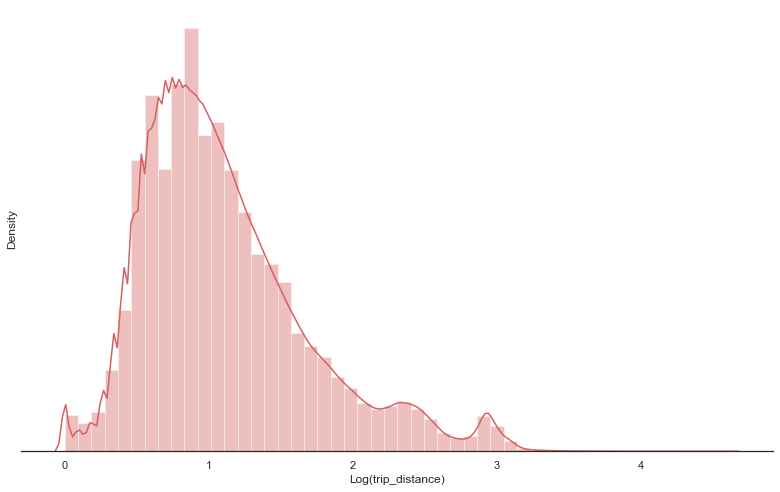

In [18]:
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_distance'].values+1), axlabel = 'Log(trip_distance)', label = 'log(trip_distance)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [19]:
# Show that each col is a numpy ndarray. Note how array size is NaN until we call compute.
# chunk sizes compte also shows how this is parallelized.
df['trip_distance'].values.compute_chunk_sizes()

dask.array<values, shape=(14776617,), dtype=float64, chunksize=(14776617,), chunktype=numpy.ndarray>

In [20]:
# number of rows
numrows = df.shape[0].compute()
# number of columns
numcols = df.shape[1]
print("Number of rows {} number of columns {}".format(numrows, numcols))

Number of rows 14776617 number of columns 19


In [21]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).map(lambda x: x.total_seconds())

In [22]:
df['trip_duration'].describe().compute()

count   14776617.00000
mean         694.53914
std        24465.83116
min       -29589.00000
25%          360.00000
50%          555.00000
75%          886.00000
max     69924412.00000
Name: trip_duration, dtype: float64

In [23]:
duration_diff = np.abs(df['trip_duration'])

In [24]:
# clean up data as we see some dirty inputs
df = df[df['trip_duration'] <= 10000]
df = df[df['trip_duration'] >= 30]

In [10]:
df['trip_duration'].describe().compute()

count    1.471284e+07
mean     6.870160e+02
std      4.948729e+02
min      3.000000e+01
25%      3.600000e+02
50%      5.590000e+02
75%      8.900000e+02
max      9.989000e+03
Name: trip_duration, dtype: float64

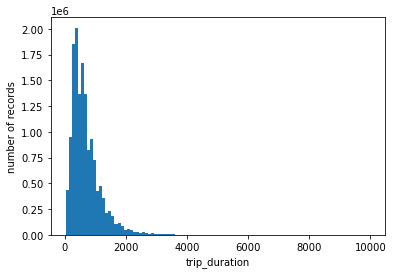

In [11]:
# note numpy -> ddf logic is slightly different. eg df[col].values vs df[col]
# visualizing whole dataset is a different fish to fry, we are just showing small ones for now.
plt.hist(df['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of records')
plt.show()

In [25]:
df['log_trip_duration'] = np.log(df['trip_duration'])


In [ ]:
plt.hist(df['log_trip_duration'], bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of records')
plt.show()
sns.distplot(df["log_trip_duration"], bins =100)

In [30]:
import xgboost as xgb

In [31]:
# we use dask random split
# train, test = df.random_split([0.7, 0.3])
train, test, validation = df.random_split([0.8, 0.1, 0.1], random_state=123)

In [32]:
train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,log_trip_duration
npartitions=1,,,,,,,,,,,,,,,,,,,,,
,int64,datetime64[ns],datetime64[ns],int64,float64,int64,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [33]:
# Chain them using dask, delay materialization...
# create dummy var out of labels.
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,log_trip_duration
0,2,2013-01-01 00:39:00,2013-01-01 00:55:00,3,3.86000,1,None,238,116,2,...,0.50000,0.50000,0.00000,0.00000,0.00000,16.00000,None,None,960.00000,6.86693
1,2,2013-01-01 00:12:00,2013-01-01 00:16:00,5,0.00000,1,None,264,264,1,...,0.50000,0.50000,0.12000,0.00000,0.00000,4.62000,None,None,240.00000,5.48064
2,2,2013-01-01 00:02:00,2013-01-01 00:03:00,3,0.00000,1,None,264,264,1,...,0.50000,0.50000,0.25000,0.00000,0.00000,3.75000,None,None,60.00000,4.09434
4,2,2013-01-01 00:03:00,2013-01-01 00:04:00,4,0.00000,1,None,264,264,1,...,0.50000,0.50000,0.07000,0.00000,0.00000,4.07000,None,None,60.00000,4.09434
5,2,2013-01-01 00:03:00,2013-01-01 00:04:00,3,0.00000,1,None,146,146,1,...,0.50000,0.50000,0.25000,0.00000,0.00000,3.75000,None,None,60.00000,4.09434


In [34]:
# We could've read it at categorical when reading the parquet as specified in dtypes.
# Or we  can do it here.
# unlike pandas, must be categorized before calling dummy.
train = train.categorize("VendorID")
test = test.categorize("VendorID")

Task exception was never retrieved
future: <Task finished name='Task-1168' coro=<Client._gather.<locals>.wait() done, defined at /opt/anaconda3/lib/python3.9/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit


In [35]:
train = train.categorize("VendorID")
train = train.categorize("passenger_count")
train = train.categorize("store_and_fwd_flag")


In [36]:
test = test.categorize("VendorID")
test = test.categorize("passenger_count")
test = test.categorize("store_and_fwd_flag")

In [37]:
vendor_train = dd.get_dummies(train, columns=["VendorID"], prefix='vi', prefix_sep='_')

In [38]:
test_train = dd.get_dummies(test, columns=["VendorID"], prefix='vi', prefix_sep='_')

In [39]:
vendor_train.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,log_trip_duration,vi_2,vi_1
0,2013-01-01 00:39:00,2013-01-01 00:55:00,3,3.86000,1,NaN,238,116,2,15.00000,...,0.00000,0.00000,0.00000,16.00000,None,None,960.00000,6.86693,1,0
1,2013-01-01 00:12:00,2013-01-01 00:16:00,5,0.00000,1,NaN,264,264,1,3.50000,...,0.12000,0.00000,0.00000,4.62000,None,None,240.00000,5.48064,1,0
2,2013-01-01 00:02:00,2013-01-01 00:03:00,3,0.00000,1,NaN,264,264,1,2.50000,...,0.25000,0.00000,0.00000,3.75000,None,None,60.00000,4.09434,1,0
4,2013-01-01 00:03:00,2013-01-01 00:04:00,4,0.00000,1,NaN,264,264,1,3.00000,...,0.07000,0.00000,0.00000,4.07000,None,None,60.00000,4.09434,1,0
5,2013-01-01 00:03:00,2013-01-01 00:04:00,3,0.00000,1,NaN,146,146,1,2.50000,...,0.25000,0.00000,0.00000,3.75000,None,None,60.00000,4.09434,1,0


In [40]:
# Full list of categorical vars

vendor_train = dd.get_dummies(train, columns=["VendorID"], prefix='vi', prefix_sep='_')
vendor_test = dd.get_dummies(test, columns=["VendorID"], prefix='vi', prefix_sep='_')

passenger_count_train = dd.get_dummies(train, columns = ['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test =dd.get_dummies(test, columns= ['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = dd.get_dummies(train, columns = ['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = dd.get_dummies(test, columns=['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
# cluster_pickup_train = dd.get_dummies(train, columns = ['pickup_cluster'], prefix='p', prefix_sep='_')
# cluster_pickup_test = dd.get_dummies(test, columns=['pickup_cluster'], prefix='p', prefix_sep='_')
# cluster_dropoff_train = dd.get_dummies(train, columns = 'dropoff_cluster'], prefix='d', prefix_sep='_')
# cluster_dropoff_test = dd.get_dummies(test, columns=['dropoff_cluster'], prefix='d', prefix_sep='_')

# month_train = dd.get_dummies(train, columns = ['Month'], prefix='m', prefix_sep='_')
# month_test = dd.get_dummies(test, columns=['Month'], prefix='m', prefix_sep='_')
# dom_train = dd.get_dummies(train, columns = ['DayofMonth'], prefix='dom', prefix_sep='_')
# dom_test = dd.get_dummies(test, columns=['DayofMonth'], prefix='dom', prefix_sep='_')
# hour_train = dd.get_dummies(train, columns = ['Hour'], prefix='h', prefix_sep='_')
# hour_test = dd.get_dummies(test, columns=['Hour'], prefix='h', prefix_sep='_')
# dow_train = dd.get_dummies(train, columns = ['dayofweek'], prefix='dow', prefix_sep='_')
# dow_test = dd.get_dummies(test, columns=['dayofweek'], prefix='dow', prefix_sep='_')

In [41]:
# enrich the datetime into month/ hour / day, and turn it into dummy
train['Month'] = train['tpep_pickup_datetime'].dt.month
test['Month'] = test['tpep_pickup_datetime'].dt.month
# harder way to to the same thing.
# test['Month'] = (test['tpep_pickup_datetime']).map(lambda x: x.month)
train['DayofMonth'] = train['tpep_pickup_datetime'].dt.day
test['DayofMonth'] = test['tpep_pickup_datetime'].dt.day


In [42]:
test.groupby('DayofMonth').count().compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,log_trip_duration
DayofMonth,,,,,,,,,,,,,,,,,,,,,
1,40749,40749,40749,40749,40749,40749,19724,40749,40749,40749,...,40749,40749,40749,40749,40749,40749,0,0,40749,40749
2,38834,38834,38834,38834,38834,38834,19273,38834,38834,38834,...,38834,38834,38834,38834,38834,38834,0,0,38834,38834
3,43953,43953,43953,43953,43953,43953,22025,43953,43953,43953,...,43953,43953,43953,43953,43953,43953,0,0,43953,43953
4,47864,47864,47864,47864,47864,47864,24142,47864,47864,47864,...,47864,47864,47864,47864,47864,47864,0,0,47864,47864
5,47052,47052,47052,47052,47052,47052,23759,47052,47052,47052,...,47052,47052,47052,47052,47052,47052,0,0,47052,47052
6,40160,40160,40160,40160,40160,40160,20679,40160,40160,40160,...,40160,40160,40160,40160,40160,40160,0,0,40160,40160
7,40600,40600,40600,40600,40600,40600,20862,40600,40600,40600,...,40600,40600,40600,40600,40600,40600,0,0,40600,40600
8,44004,44004,44004,44004,44004,44004,22268,44004,44004,44004,...,44004,44004,44004,44004,44004,44004,0,0,44004,44004
9,45440,45440,45440,45440,45440,45440,22992,45440,45440,45440,...,45440,45440,45440,45440,45440,45440,0,0,45440,45440


In [47]:
test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,log_trip_duration,DayofMonth,Hour,dayofweek
7,2,2013-01-01 00:06:00,2013-01-01 00:09:00,4,0.00000,1,NaN,146,146,1,...,0.00000,0.00000,5.15000,None,None,180.00000,5.19296,1,0,1
13,2,2013-01-01 00:36:00,2013-01-01 00:46:00,1,1.97000,1,NaN,249,13,1,...,0.00000,0.00000,11.50000,None,None,600.00000,6.39693,1,0,1
18,1,2013-01-01 00:07:08,2013-01-01 00:30:15,1,3.20000,1,N,17,37,1,...,0.00000,0.00000,18.00000,None,None,1387.00000,7.23490,1,0,1
20,1,2013-01-01 00:55:51,2013-01-01 01:21:54,4,3.80000,1,N,256,36,2,...,0.00000,0.00000,17.50000,None,None,1563.00000,7.35436,1,0,1
29,1,2013-01-01 00:13:34,2013-01-01 00:18:57,2,0.80000,1,N,262,236,2,...,0.00000,0.00000,6.50000,None,None,323.00000,5.77765,1,0,1


In [44]:
train['Hour'] = train['tpep_pickup_datetime'].dt.hour
test['Hour'] = test['tpep_pickup_datetime'].dt.hour


In [45]:
train['dayofweek'] = train['tpep_pickup_datetime'].dt.dayofweek
test['dayofweek'] = test['tpep_pickup_datetime'].dt.dayofweek


In [50]:
train = train.categorize("Month")
test = test.categorize("Month")

train = train.categorize("DayofMonth")
test = test.categorize("DayofMonth")

In [51]:
train = train.categorize("dayofweek")
test = test.categorize("dayofweek")

In [52]:
month_train = dd.get_dummies(train, columns = ['dayofweek'], prefix='m', prefix_sep='_')
month_test = dd.get_dummies(test, columns=['dayofweek'], prefix='m', prefix_sep='_')

In [53]:

dom_train = dd.get_dummies(train, columns = ['dayofweek'], prefix='dom', prefix_sep='_')
dom_test = dd.get_dummies(test, columns=['dayofweek'], prefix='dom', prefix_sep='_')

hour_train = dd.get_dummies(train, columns = ['dayofweek'], prefix='h', prefix_sep='_')
hour_test = dd.get_dummies(test, columns=['dayofweek'], prefix='h', prefix_sep='_')

dow_train = dd.get_dummies(train, columns = ['dayofweek'], prefix='dow', prefix_sep='_')
dow_test = dd.get_dummies(test, columns=['dayofweek'], prefix='dow', prefix_sep='_')
# vendor_test = dd.get_dummies(test, columns=["VendorID"], prefix='vi', prefix_sep='_')

In [54]:
# calculate and add average speed col
train['avg_speed_h'] = 1000 * train['trip_distance'] / train['trip_duration']
test['avg_speed_h'] = 1000 * test['trip_distance'] / test['trip_duration']

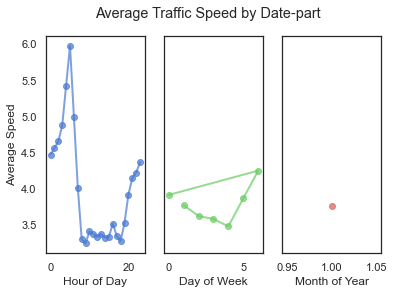

In [55]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('Hour').avg_speed_h.mean().compute(), 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('dayofweek').avg_speed_h.mean().compute(), 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('Month').avg_speed_h.mean().compute(), 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

In [56]:
train_final = train.drop(['VendorID','passenger_count','store_and_fwd_flag', 'Month','DayofMonth','Hour','dayofweek'], axis = 1)
test_final = test.drop(['VendorID','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','dayofweek'], axis = 1)
train_final = train_final.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime', 'trip_duration', 'avg_speed_h'], axis = 1)
test_final = test_final.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime', 'trip_duration', 'avg_speed_h'], axis = 1)

In [57]:
X_train = train_final.drop(['log_trip_duration'], axis=1)

In [58]:
Y_train = train_final["log_trip_duration"]
X_test = test_final.drop(['log_trip_duration'], axis=1)
Y_test = test_final["log_trip_duration"]

In [59]:
# Just like standard xgb Dmatrix, but note that we are explicitly passing in columns since we're dealing with Pandas, and that we need to give the colnames for xgb to know feature names

In [60]:
dtrain = xgb.DMatrix(X_train, label=Y_train, feature_names=X_train.columns)

In [61]:
dvalid = xgb.DMatrix(X_test, label=Y_test,  feature_names=X_test.columns)

In [62]:
import pandas as pd


In [63]:
# # Add indicator variables - maybe for later
# Train_Master = pd.concat([train,
#                           vendor_train,
#                           passenger_count_train,
#                           store_and_fwd_flag_train,
#                          month_train,
#                          dom_train,
#                           hour_test,
#                           dow_train
#                          ], axis=1)
# Test_master = pd.concat([test, 
#                          vendor_train,
#                          passenger_count_test,
#                          store_and_fwd_flag_test,
#                          month_test,
#                          dom_test,
#                           hour_test,
#                           dow_test], axis=1)

In [64]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [65]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[12:48:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:2.92882	valid-rmse:2.92859
[1]	train-rmse:1.47309	valid-rmse:1.47288
[2]	train-rmse:0.75195	valid-rmse:0.75187
[3]	train-rmse:0.40503	valid-rmse:0.40501
[4]	train-rmse:0.25043	valid-rmse:0.25059
[5]	train-rmse:0.18960	valid-rmse:0.18983
[6]	train-rmse:0.16924	valid-rmse:0.16940
[7]	train-rmse:0.16158	valid-rmse:0.16180
[8]	train-

In [66]:
X_train.dtypes


trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge      object
airport_fee               object
dtype: object

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

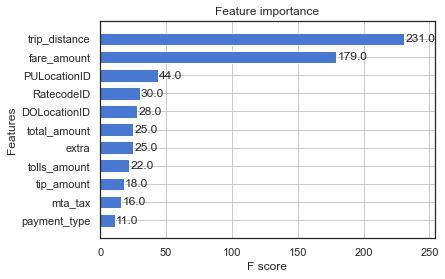

In [68]:


xgb.plot_importance(model, max_num_features=28, height=0.7)


In [ ]:
pred = model.predict(dtest)
pred = np.exp(pred) - 1

In [ ]:
sns.despine(left=True)
sns.distplot(
    np.log(df['trip_distance'].values+1),
    axlabel = 'Log(trip_distance)', label = 'log(trip_distance)', bins = 50, color="r")
plt.setp(axes, yticks=[])


Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x000001709DFAE700>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\_weakrefset.py", line 40, in _remove
    self = selfref()
KeyboardInterrupt: 
Task exception was never retrieved
future: <Task finished name='Task-7347' coro=<Client._gather.<locals>.wait() done, defined at C:\ProgramData\Anaconda3\lib\site-packages\distributed\client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\distributed\client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit


KeyboardInterrupt: 

In [ ]:
# Train, Test = train_test_split(Train_Master[0:100000], test_size = 0.2)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [ ]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

In [ ]:
sns.despine(left=True)
sns.distplot(
    np.log(df['trip_distance'].values+1),
    axlabel = 'Log(trip_distance)', label = 'log(trip_distance)', bins = 50, color="r")
plt.setp(axes, yticks=[])


In [26]:
client.close()

In [6]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:53543/status,
Dashboard: http://127.0.0.1:53543/status,Workers: 3
Total threads: 3,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:53544,Workers: 3
Dashboard: http://127.0.0.1:53543/status,Total threads: 3
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:53574,Total threads: 1
Dashboard: http://127.0.0.1:53575/status,Memory: 0 B
Nanny: tcp://127.0.0.1:53547,
